In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('winequality-red.csv')
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.shape

(1599, 12)

In [6]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
data.quality.unique()#6 targets

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
data.isnull().sum()#no NaN value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
cor=data.corr()
cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

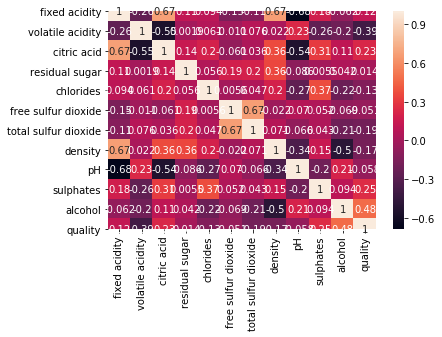

In [13]:
sns.heatmap(cor,annot=True)

# Plotting outliers

In [14]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

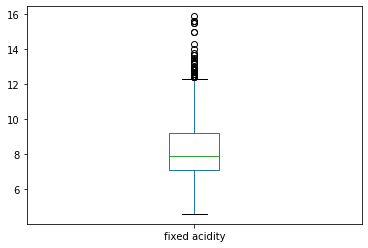

In [17]:
data['fixed acidity'].plot.box()

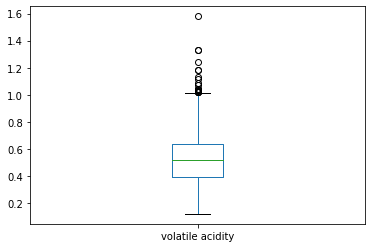

In [18]:
data['volatile acidity'].plot.box()

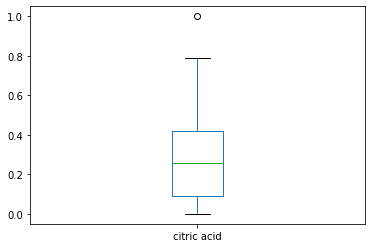

In [22]:
data['citric acid'].plot.box()

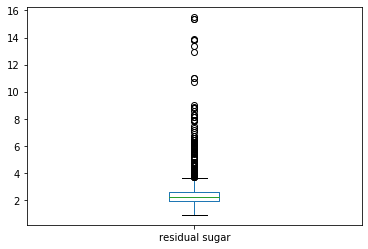

In [24]:
data['residual sugar'].plot.box()

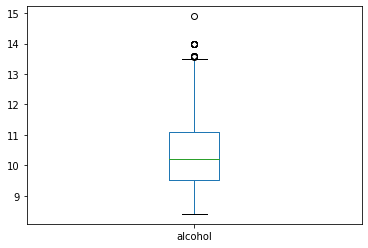

In [25]:
data['alcohol'].plot.box()

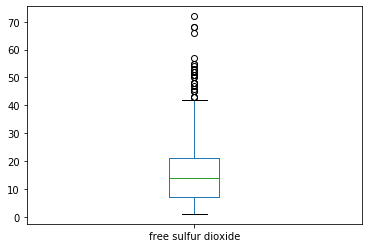

In [26]:
data['free sulfur dioxide'].plot.box()

Removing the outliers

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [41]:
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [42]:
data_new=data[(z<3).all(axis=1)]
data_new

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1451 rows x 12 columns]

In [62]:
print(data.shape)
print(data_new.shape)

(1599, 12)
(1451, 12)


In [43]:
collist=data_new.columns.values
ncols=12
nrows=12

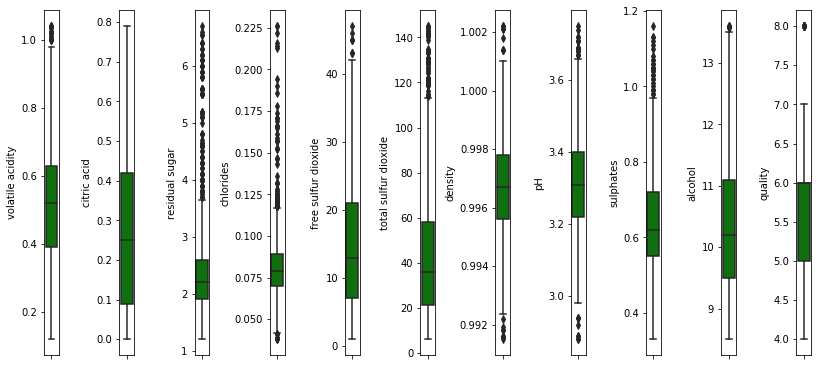

In [45]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

Checking the skewness

In [48]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [49]:
data_new.skew()#After removing the outliers

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [52]:
from scipy.stats import boxcox
list1=['fixed acidity','free sulfur dioxide','sulphates','alcohol']
data_new['fixed acidity']=boxcox(data_new['fixed acidity'],0)
data_new['free sulfur dioxide']=boxcox(data_new['free sulfur dioxide'],0)
data_new['sulphates']=boxcox(data_new['sulphates'],0)
data_new['alcohol']=boxcox(data_new['alcohol'],0)

In [53]:
data_new.skew()#Normally distributed

fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide    -0.303456
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.525551
quality                 0.407865
dtype: float64

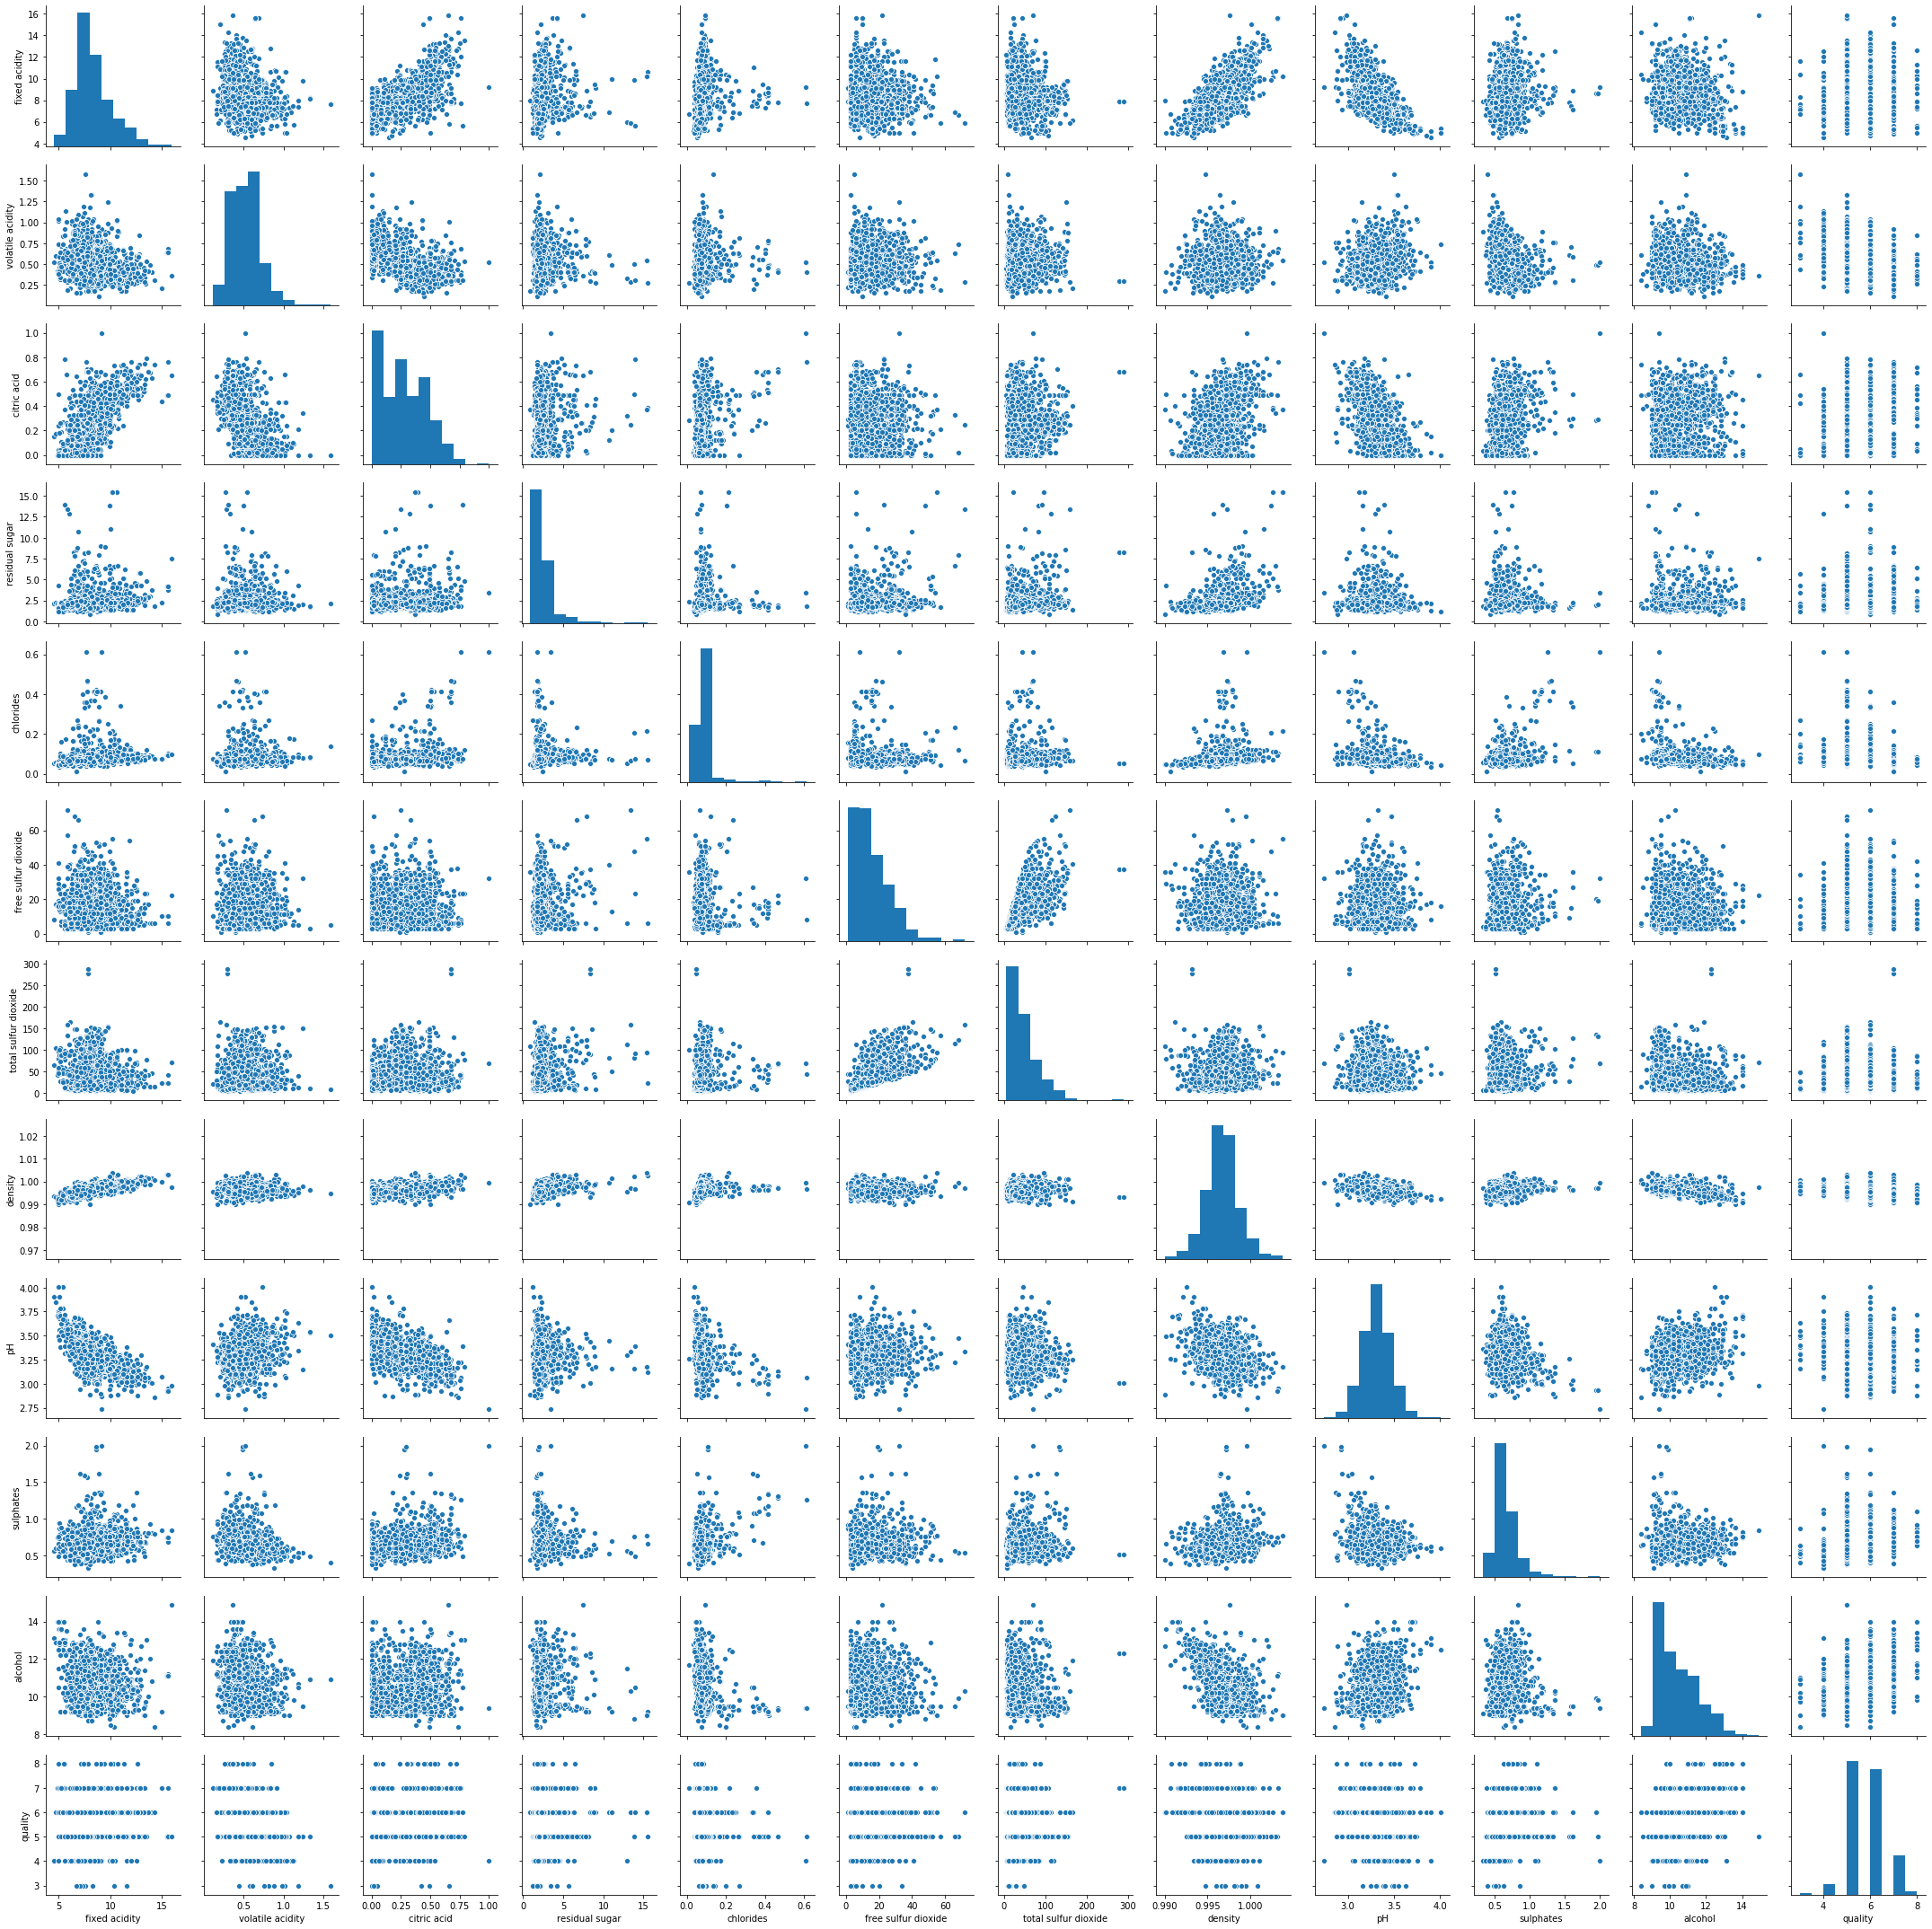

In [39]:
sns.pairplot(data)

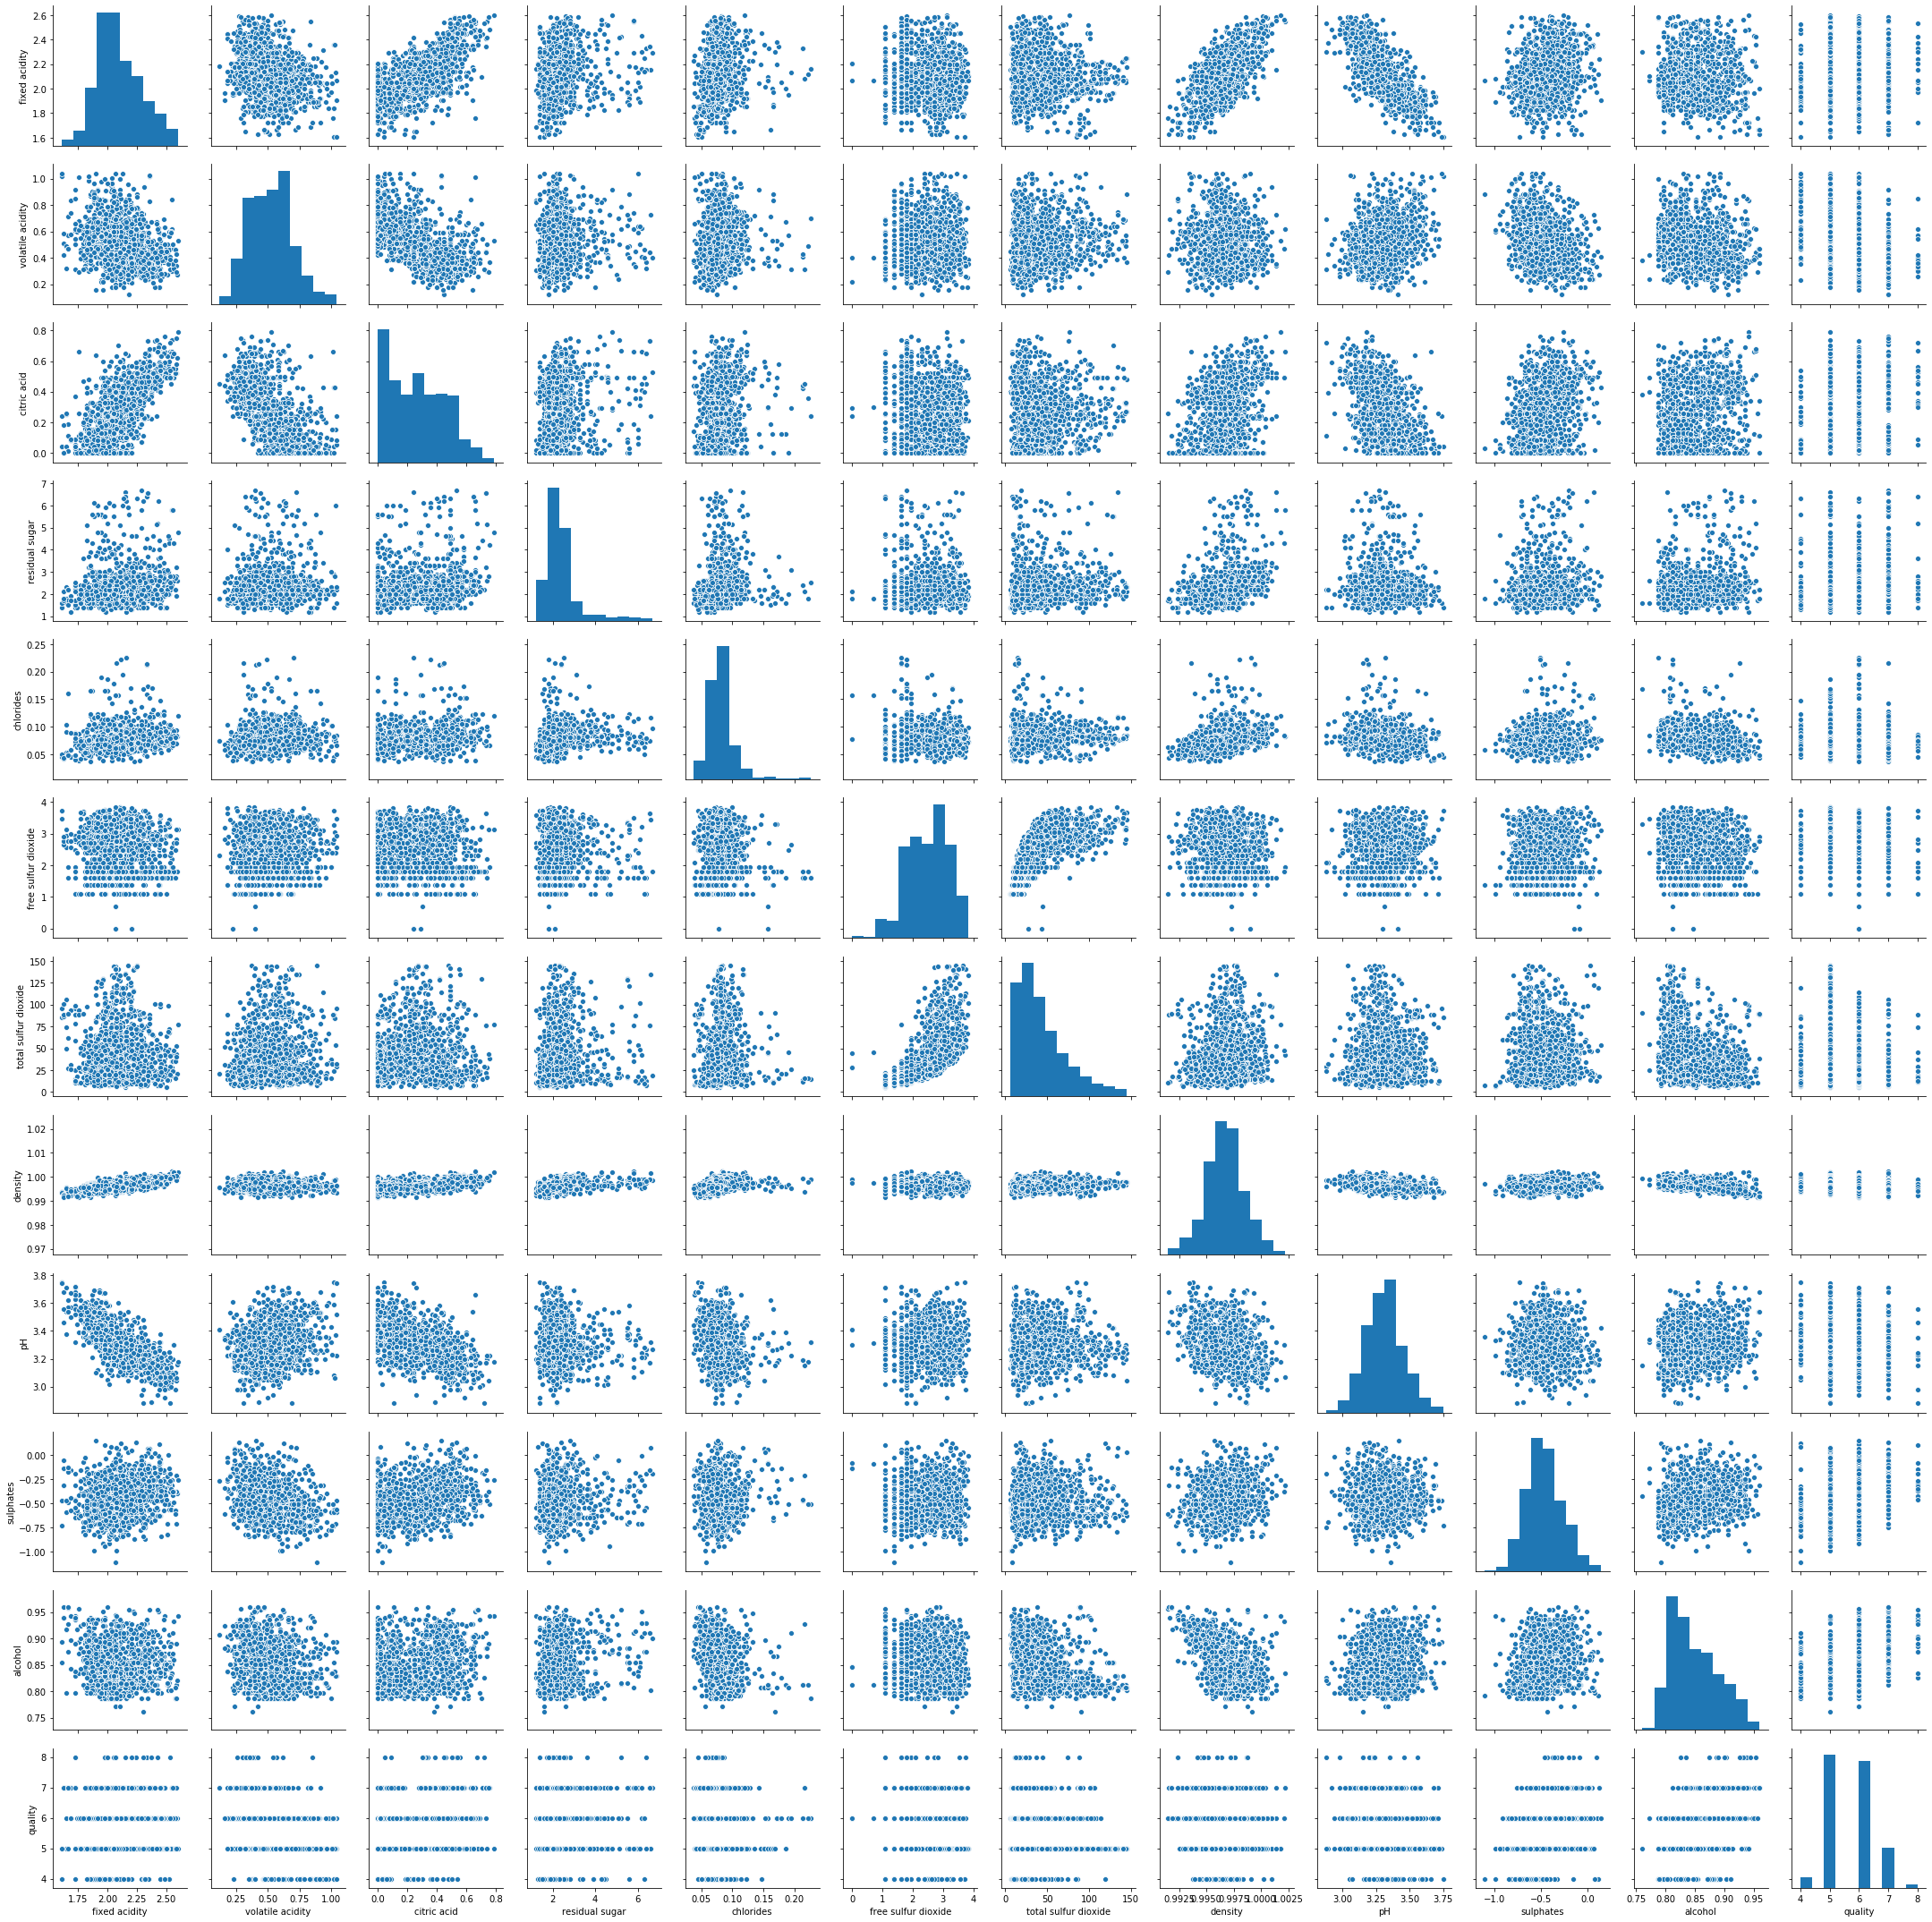

In [54]:
sns.pairplot(data_new)

In [56]:
cor_new=data_new.corr()
cor_new

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.296513     0.691118   
volatile acidity          -0.296513          1.000000    -0.589452   
citric acid                0.691118         -0.589452     1.000000   
residual sugar             0.179476          0.025977     0.184960   
chlorides                  0.197343          0.072709     0.100361   
free sulfur dioxide       -0.172552          0.052840    -0.110867   
total sulfur dioxide      -0.089858          0.110338     0.005301   
density                    0.663494         -0.004957     0.371729   
pH                        -0.722263          0.251343    -0.520311   
sulphates                  0.190488         -0.353628     0.307876   
alcohol                   -0.034357         -0.213391     0.167849   
quality                    0.138709         -0.353443     0.243999   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.179476   0.197343            -0.172552   
volatile acidity            0.025977   0.072709             0.052840   
citric acid                 0.184960   0.100361            -0.110867   
residual sugar              1.000000   0.126735            -0.006968   
chlorides                   0.126735   1.000000            -0.066329   
free sulfur dioxide        -0.006968  -0.066329             1.000000   
total sulfur dioxide        0.095093   0.045025             0.669910   
density                     0.344801   0.328695            -0.038705   
pH                         -0.075140  -0.182841             0.134538   
sulphates                   0.077003   0.024276             0.041883   
alcohol                     0.162360  -0.205690            -0.092725   
quality                     0.061482  -0.108787            -0.074309   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.089858  0.663494 -0.722263   0.190488   
volatile acidity                  0.110338 -0.004957  0.251343  -0.353628   
citric acid                       0.005301  0.371729 -0.520311   0.307876   
residual sugar                    0.095093  0.344801 -0.075140   0.077003   
chlorides                         0.045025  0.328695 -0.182841   0.024276   
free sulfur dioxide               0.669910 -0.038705  0.134538   0.041883   
total sulfur dioxide              1.000000  0.118965 -0.005940  -0.037555   
density                           0.118965  1.000000 -0.312310   0.135509   
pH                               -0.005940 -0.312310  1.000000  -0.024869   
sulphates                        -0.037555  0.135509 -0.024869   1.000000   
alcohol                          -0.266994 -0.461277  0.136798   0.256790   
quality                          -0.237745 -0.167568 -0.082164   0.402169   

                       alcohol   quality  
fixed acidity        -0.034357  0.138709  
volatile acidity     -0.213391 -0.353443  
citric acid           0.167849  0.243999  
residual sugar        0.162360  0.061482  
chlorides            -0.205690 -0.108787  
free sulfur dioxide  -0.092725 -0.074309  
total sulfur dioxide -0.266994 -0.237745  
density              -0.461277 -0.167568  
pH                    0.136798 -0.082164  
sulphates             0.256790  0.402169  
alcohol               1.000000  0.500138  
quality               0.500138  1.000000

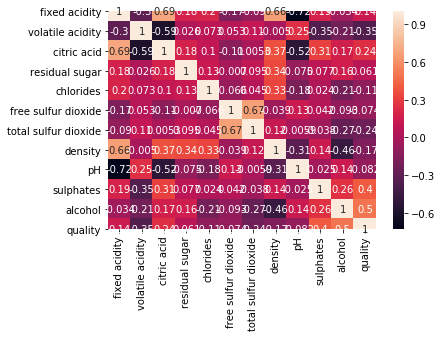

In [58]:
sns.heatmap(cor_new,annot=True)

Outlier removal and skewness transformation done

In [59]:
data_new

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.001480             0.700         0.00             1.9      0.076   
1          2.054124             0.880         0.00             2.6      0.098   
2          2.054124             0.760         0.04             2.3      0.092   
3          2.415914             0.280         0.56             1.9      0.075   
4          2.001480             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594       1.824549             0.600         0.08             2.0      0.090   
1595       1.774952             0.550         0.10             2.2      0.062   
1596       1.840550             0.510         0.13             2.3      0.076   
1597       1.774952             0.645         0.12             2.0      0.075   
1598       1.791759             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                2.397895                  34.0  0.99780  3.51  -0.579818   
1                3.218876                  67.0  0.99680  3.20  -0.385662   
2                2.708050                  54.0  0.99700  3.26  -0.430783   
3                2.833213                  60.0  0.99800  3.16  -0.544727   
4                2.397895                  34.0  0.99780  3.51  -0.579818   
...                   ...                   ...      ...   ...        ...   
1594             3.465736                  44.0  0.99490  3.45  -0.544727   
1595             3.663562                  51.0  0.99512  3.52  -0.274437   
1596             3.367296                  40.0  0.99574  3.42  -0.287682   
1597             3.465736                  44.0  0.99547  3.57  -0.342490   
1598             2.890372                  42.0  0.99549  3.39  -0.415515   

       alcohol  quality  
0     0.806793        5  
1     0.825220        5  
2     0.825220        5  
3     0.825220        6  
4     0.806793        5  
...        ...      ...  
1594  0.855000        5  
1595  0.882078        6  
1596  0.874591        6  
1597  0.842596        5  
1598  0.874591        6  

[1451 rows x 12 columns]

In [60]:
x=data_new.iloc[:,0:-1]
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.001480             0.700         0.00             1.9      0.076   
1          2.054124             0.880         0.00             2.6      0.098   
2          2.054124             0.760         0.04             2.3      0.092   
3          2.415914             0.280         0.56             1.9      0.075   
4          2.001480             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594       1.824549             0.600         0.08             2.0      0.090   
1595       1.774952             0.550         0.10             2.2      0.062   
1596       1.840550             0.510         0.13             2.3      0.076   
1597       1.774952             0.645         0.12             2.0      0.075   
1598       1.791759             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                2.397895                  34.0  0.99780  3.51  -0.579818   
1                3.218876                  67.0  0.99680  3.20  -0.385662   
2                2.708050                  54.0  0.99700  3.26  -0.430783   
3                2.833213                  60.0  0.99800  3.16  -0.544727   
4                2.397895                  34.0  0.99780  3.51  -0.579818   
...                   ...                   ...      ...   ...        ...   
1594             3.465736                  44.0  0.99490  3.45  -0.544727   
1595             3.663562                  51.0  0.99512  3.52  -0.274437   
1596             3.367296                  40.0  0.99574  3.42  -0.287682   
1597             3.465736                  44.0  0.99547  3.57  -0.342490   
1598             2.890372                  42.0  0.99549  3.39  -0.415515   

       alcohol  
0     0.806793  
1     0.825220  
2     0.825220  
3     0.825220  
4     0.806793  
...        ...  
1594  0.855000  
1595  0.882078  
1596  0.874591  
1597  0.842596  
1598  0.874591  

[1451 rows x 11 columns]

In [65]:
y=data_new.iloc[:,-1].values
y=y.reshape(-1,1)

In [66]:
print(x.shape)
print(y.shape)

(1451, 11)
(1451, 1)


In [67]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=42)

In [68]:
train_x.shape

(1015, 11)

In [70]:
test_x.shape

(436, 11)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [74]:
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
pred=lr.predict(test_x)
print('Predicted Quality',pred)
print('Actual Quality',test_y)

Predicted Quality [[6.57768556]
 [5.26292365]
 [5.30747086]
 [5.99083877]
 [5.39498648]
 [5.0602228 ]
 [6.0215497 ]
 [5.35342751]
 [5.83424227]
 [5.19230338]
 [6.26968531]
 [6.04735896]
 [5.01379664]
 [6.2710413 ]
 [6.14729749]
 [6.75050605]
 [5.62648616]
 [6.01403332]
 [5.98158592]
 [5.66317688]
 [4.9835111 ]
 [5.54075353]
 [5.54051484]
 [5.0826591 ]
 [5.66756176]
 [5.31801402]
 [6.16368033]
 [6.3108607 ]
 [5.35342751]
 [5.35913482]
 [6.21461469]
 [5.1454098 ]
 [6.26882142]
 [5.7163073 ]
 [5.01079985]
 [5.96520584]
 [6.26945032]
 [6.24428528]
 [5.2563838 ]
 [5.00579558]
 [6.89369222]
 [6.54782146]
 [6.04857849]
 [5.29607531]
 [5.65596664]
 [6.0888432 ]
 [5.9035495 ]
 [5.54782872]
 [5.58580008]
 [6.27513201]
 [6.32532187]
 [6.08857355]
 [5.05838534]
 [5.47707963]
 [5.47440266]
 [5.27680659]
 [4.93349291]
 [6.49588831]
 [6.26976602]
 [5.63719269]
 [5.01624924]
 [5.32176791]
 [5.76246628]
 [5.44648298]
 [5.34249525]
 [5.31650325]
 [5.0681531 ]
 [5.73418034]
 [5.13583717]
 [5.78012791]
 [

In [77]:
print('Mean Absolute Error',mean_absolute_error(test_y,pred))
print('Mean Squared Error',mean_squared_error(test_y,pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(test_y,pred)))

Mean Absolute Error 0.4892381715813232
Mean Squared Error 0.3977541015695542
Root Mean Squared Error 0.6306774941042008


In [78]:
print('R2 Score',r2_score(test_y,pred))

R2 Score 0.36101728463406924


In [80]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [81]:
sv=SVR()
sv.fit(train_x,train_y)
svpred=sv.predict(test_x)
svpred

array([6.36779172, 5.63114491, 5.69150383, 6.04866608, 5.74175094,
       5.03443182, 5.99992658, 5.78681732, 5.5279295 , 5.15026135,
       5.97678111, 5.99032668, 5.25769669, 5.20400671, 6.122304  ,
       6.07852464, 5.8263189 , 5.35577838, 5.94374022, 5.3581097 ,
       5.11800134, 5.76820939, 5.44407196, 5.56685839, 5.79452432,
       5.67078375, 6.02116975, 5.09676118, 5.78681732, 5.631406  ,
       6.42125198, 5.34447412, 6.10016766, 5.6254388 , 5.54706844,
       5.85486259, 5.92921871, 6.0654512 , 5.69272603, 5.95705249,
       6.15615202, 5.52378463, 5.79395453, 5.46857947, 5.68666266,
       6.48020443, 5.14505563, 5.72720233, 5.99819394, 5.06192584,
       5.33307599, 6.15266173, 5.21242873, 5.30893811, 5.45598331,
       6.31106519, 4.95016039, 6.0895677 , 6.15043524, 5.5714125 ,
       5.13026129, 5.16982866, 5.79714417, 5.61945296, 5.22759982,
       5.70653123, 4.91499859, 5.98634363, 4.95474248, 5.70691724,
       5.86020699, 5.54352252, 5.01382878, 6.02058669, 6.00560

In [85]:
print('R2 Score',r2_score(test_y,svpred))
print('Mean Absolute Error',mean_absolute_error(test_y,svpred))
print('Mean Squared Error',mean_squared_error(test_y,svpred))
print('Root Mean Squared Eroor',np.sqrt(mean_squared_error(test_y,svpred)))

R2 Score 0.2113466729264729
Mean Absolute Error 0.542771032154709
Mean Squared Error 0.49092109695068575
Root Mean Squared Eroor 0.7006576174927992


In [90]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(train_x,train_y)
dtpred=dt.predict(test_x)
dtpred

array([7., 5., 5., 6., 6., 5., 6., 5., 6., 6., 6., 6., 5., 6., 7., 8., 6.,
       5., 6., 6., 5., 5., 5., 6., 6., 4., 6., 7., 5., 5., 7., 5., 6., 6.,
       5., 4., 6., 6., 5., 6., 6., 7., 6., 5., 7., 8., 6., 5., 5., 7., 7.,
       6., 5., 5., 6., 5., 4., 7., 6., 6., 5., 5., 6., 5., 5., 6., 5., 6.,
       6., 6., 6., 4., 5., 7., 6., 6., 6., 5., 5., 5., 5., 5., 6., 6., 5.,
       5., 7., 5., 5., 7., 4., 4., 5., 6., 5., 6., 7., 6., 7., 5., 5., 5.,
       5., 6., 5., 5., 8., 6., 5., 6., 7., 6., 6., 6., 6., 5., 5., 5., 6.,
       5., 5., 7., 5., 6., 7., 5., 6., 7., 8., 4., 6., 7., 5., 4., 6., 6.,
       5., 7., 5., 5., 7., 6., 6., 6., 5., 5., 5., 5., 5., 6., 7., 5., 6.,
       5., 5., 5., 5., 6., 5., 6., 6., 6., 5., 6., 5., 7., 6., 5., 5., 6.,
       6., 7., 6., 5., 6., 6., 6., 5., 6., 5., 6., 5., 6., 6., 5., 7., 6.,
       7., 7., 5., 5., 6., 5., 6., 6., 7., 7., 5., 6., 5., 6., 5., 6., 5.,
       6., 5., 5., 5., 7., 5., 5., 5., 6., 6., 6., 6., 5., 5., 6., 6., 7.,
       5., 5., 7., 6., 7.

In [91]:
print('R2 Score',r2_score(test_y,dtpred))
print('Mean Absolute Error',mean_absolute_error(test_y,dtpred))
print('Mean Squared Error',mean_squared_error(test_y,dtpred))
print('Root Mean Squared Eroor',np.sqrt(mean_squared_error(test_y,dtpred)))

R2 Score -0.0722126915178607
Mean Absolute Error 0.5160550458715596
Mean Squared Error 0.6674311926605505
Root Mean Squared Eroor 0.8169646214252797


In [95]:
from sklearn.neighbors import KNeighborsRegressor

In [96]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(train_x,train_y)
knpred=knn.predict(test_x)
knpred

array([[5.8],
       [6. ],
       [6. ],
       [5.4],
       [5.8],
       [5. ],
       [6. ],
       [5.8],
       [5.6],
       [5. ],
       [5.8],
       [5.8],
       [5.4],
       [5.2],
       [6.4],
       [5.8],
       [5.4],
       [5.6],
       [6.4],
       [5.6],
       [5.4],
       [5. ],
       [5.8],
       [5.8],
       [6.2],
       [5.2],
       [6. ],
       [5. ],
       [5.8],
       [5.4],
       [5.8],
       [5.4],
       [6.4],
       [6. ],
       [6. ],
       [5.4],
       [6. ],
       [5.8],
       [6. ],
       [5.8],
       [6. ],
       [5.8],
       [5.8],
       [5.2],
       [5.2],
       [6.8],
       [5.2],
       [6.6],
       [6. ],
       [5.4],
       [5.2],
       [6. ],
       [5.4],
       [5.6],
       [5.8],
       [6.6],
       [5.4],
       [6.4],
       [5.8],
       [5.8],
       [5.4],
       [5. ],
       [5.2],
       [5.8],
       [5.2],
       [6.2],
       [5. ],
       [5.6],
       [4.8],
       [5.4],
       [6. ],
      

In [97]:
print('R2 Score',r2_score(test_y,knpred))
print('Mean Absolute Error',mean_absolute_error(test_y,knpred))
print('Mean Squared Error',mean_squared_error(test_y,knpred))
print('Root Mean Squared Eroor',np.sqrt(mean_squared_error(test_y,knpred)))

R2 Score 0.027418343460293926
Mean Absolute Error 0.623394495412844
Mean Squared Error 0.6054128440366972
Root Mean Squared Eroor 0.7780828002447407


In [98]:
from sklearn.externals import joblib
joblib.dump(lr,'lr_winequality.obj')

['lr_winequality.obj']